In [1]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, Dense, Dropout, Flatten,
                                     MaxPooling2D)
from sklearn.model_selection import train_test_split
import os

import numpy as np
from PIL import Image

# ścieżka do folderu z danymi
data_dir = 'dogs-cats-mini'

# funkcja do przetwarzania obrazów


def process_image(img_path):
    img = Image.open(img_path)
    # zmiana rozmiaru obrazu na 64x64 piksele
    img = img.resize((64, 64))
    # konwersja obrazu na tablicę numpy
    img_array = np.array(img)
    # normalizacja wartości pikseli do zakresu [0, 1]
    img_array = img_array / 255.
    # wyciągnięcie klasy (cat/dog) z nazwy pliku
    label = os.path.splitext(os.path.basename(img_path))[0]
    label = label.split('.')[0]
    label_number = 0 if label == 'cat' else 1
    return (img_array, label_number)


# lista z danymi (obraz i etykieta)
data = []
# przetworzenie wszystkich obrazów w folderze
for filename in os.listdir(data_dir)[::50]:
    if filename.endswith('.jpg'):
        img_path = os.path.join(data_dir, filename)
        img_data = process_image(img_path)
        data.append(img_data)

# podział danych na tablicę z obrazami i tablicę z etykietami
images = np.array([x[0] for x in data])
labels = np.array([x[1] for x in data])


In [2]:

# podział danych na zbiór treningowy i testowy
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.2, random_state=42)


In [3]:
# definicja modelu sieci konwolucyjnej
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [6]:
# kompilacja modelu
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

# wytrenowanie modelu
history = model.fit(train_images, train_labels,
                    epochs=30, validation_split=0.2)



Epoch 1/30
10/10 [==============================] - 3s 128ms/step - loss: 0.0356 - accuracy: 0.9906 - val_loss: 1.9063 - val_accuracy: 0.6375
Epoch 2/30
10/10 [==============================] - 1s 99ms/step - loss: 0.0289 - accuracy: 0.9937 - val_loss: 1.7956 - val_accuracy: 0.6500
Epoch 3/30
10/10 [==============================] - 1s 111ms/step - loss: 0.0184 - accuracy: 0.9969 - val_loss: 2.0167 - val_accuracy: 0.6500
Epoch 4/30
10/10 [==============================] - 1s 96ms/step - loss: 0.0236 - accuracy: 0.9969 - val_loss: 2.0593 - val_accuracy: 0.6000
Epoch 5/30
10/10 [==============================] - 1s 110ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 2.2613 - val_accuracy: 0.6500
Epoch 6/30
10/10 [==============================] - 1s 96ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 2.2508 - val_accuracy: 0.6750
Epoch 7/30
10/10 [==============================] - 1s 96ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 2.3416 - val_accuracy: 0.6375
Epoch 8/30

In [7]:

print(history)

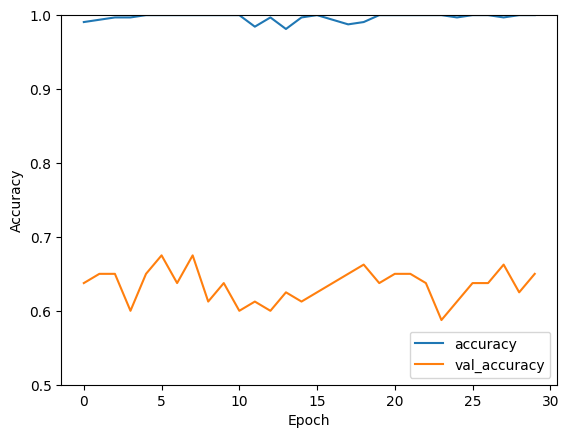

In [8]:
# wykres krzywej uczenia się
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()


In [9]:
# dokładność modelu na zbiorze testowym
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(test_acc)

4/4 - 0s - loss: 2.4614 - accuracy: 0.6400 - 201ms/epoch - 50ms/step
0.6399999856948853


In [10]:
# macierz błędu

# predykcja na zbiorze testowym
predictions = model.predict(test_images)
# zamiana prawdopodobieństw na klasy
predictions = np.where(predictions > 0.5, 1, 0)
# wygenerowanie macierzy błędu
cm = confusion_matrix(test_labels, predictions)
# wyświetlenie macierzy błędu
print(cm)

4/4 [==============================] - 0s 19ms/step
[[27 19]
 [17 37]]


1. 27 - liczby próbek, które zostały poprawnie sklasyfikowane jako koty
2. 29 - Liczba próbek, które zostały błędnie sklasyfikowane jako psy, podczas gdy są kotami
3. 17 - Liczba próbek, które zostały błędnie sklasyfikowane jako koty, podczas gdy są psami
4. 37 - Liczba próbek, które zostały poprawnie sklasyfikowane jako psy